## Support Vector Regression

The basic exercise is to solve the same question in polynomial regression but using SVR

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [14]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
##### Equation and Method

The basic method that we use in SVR is to use Support Vector Machines to do regression.

<a id='preprocessing'></a>
##### Pre processing

In [2]:
## importing the libraries for simple linear regression.

from sklearn.cross_validation import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn.preprocessing import StandardScaler

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

Feature scaling

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [6]:
X = sc_x.fit_transform(x)
Y = sc_y.fit_transform(y)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nevin/anaconda3

<a id='building'></a>
##### Building the model.
Training the model using Support vector regression

In [7]:
from sklearn.svm import SVR

In [8]:
len(X), len(Y)

(10, 10)

In [9]:
regressor = SVR(kernel='rbf')
regressor.fit(X.reshape(10, 1), Y.reshape(10, 1));

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id='result'></a>
##### Result

In [10]:
y_pred = regressor.predict(X.reshape(10, 1))

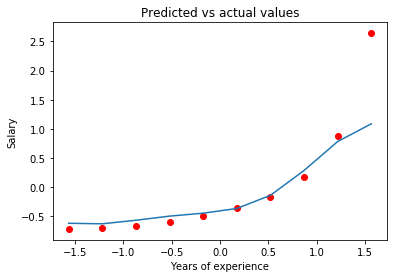

In [11]:
plt.scatter(X.reshape(10, 1), Y.reshape(10, 1), color='red')
plt.plot(X.reshape(10, 1), y_pred)
plt.title("Predicted vs actual values")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

Now for predicting the previous salary of the new employee.

In [12]:
salary_predict = sc_y.inverse_transform(regressor.predict(sc_x.transform([6.5])))

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [13]:
salary_predict[0]

170370.02040650236

Thus we can conclude that the employee was not bluffing about his salary in the previous company.